# Ice albedo feedback in the 0D energy balance model

**Credits: This notebook is based on a class exercise provided by Simona Bordoni (University of Trento) with additional ideas taken from lesson 6 of Brian Rose's climate modelling course at Albany.**

We will start our consideration of climate feedbacks with one that is not a particularly fast atmosphere process, but that is easy to understand to introduce the concept.  While glaciers have a long inertia in terms of their melting timescale, the change in snow cover on land and the growth and melting of sea ice, can occur on timescales that are seasonal and relatively fast compared to the forcing of climate change.  Take a look at this figure which shows the extent of artic sea ice cover in September (the annual relative minimum) in 1984, not long after the modern record of remotely sensed data began and 2012, which was a record mimimum until it was broken in 2020/21.

<div>
    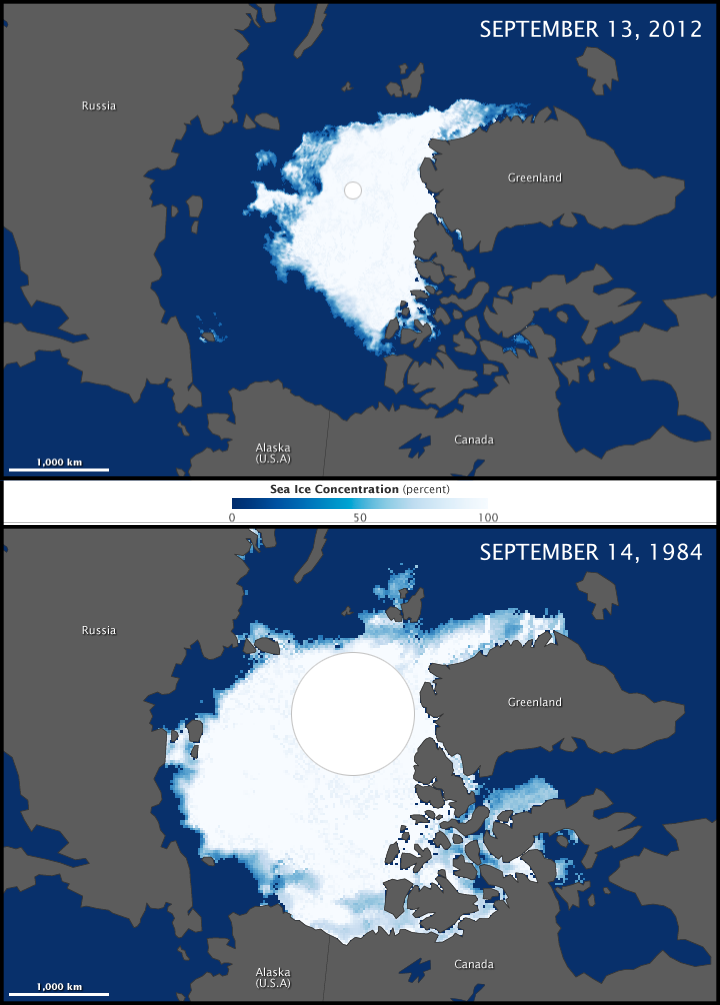
</div>
Caption: Ice cover comparison 1984 and 2012 [credit: https://energyeducation.ca/]


## Question:  How do you think the shrinking ice cover with change the TOA radiative balance?

Consider the globally averaged energy balance equation for a planet whose surface temperature is $T_s$, this time no equilibrium is assumed, so the difference between the incoming and outgoing radiation leads to a temperature tendancy:
 
$$
  C \frac{dT_s}{dt} = \frac{S_0}{4} [ 1 - \alpha(T_s)]  - \epsilon_e \sigma T_s^4
$$
 
where $C$ is the heat capacity of our system (units J m$^{-2}$ K$^{-1}$), related mainly to the deep ocean (we come back to this later), and $\epsilon_e$ is the effective surface emissivity of the Earth (refer to lecture notes). 
 
Here the albedo of the planet $\alpha$ is now a function of global mean temperature rather than a fixed constant.  
Why is this?  Well, this is to mimic the feedback due to ice (although of course one could also try to represent other temperature sensitive albedo feedbacks such as land-surface cover, although difficult to do in such a simple model).  

As the temperature cools, more of the planet is assumed to be below the threshold for ice cover, increasing the global mean albedo.  This is represented by the following function:  

$$
  \alpha(T_s) = 0.45 - 0.25 \,\mathrm{tanh} \left( \frac{(T_s-272)}{23} \right)
$$
 
 Note that we don't actually know what the ice cover is in this model, we only know the final impact on albedo.  
 
 First of all we will define this function of albedo:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# function to calculate alfa
def alpha(T):
    """ function for albedo"""
    return 0.45-0.25*np.tanh((T-272)/23)

Let's take a look at this function by plotting it.  We can do this by defining a vector of temperatures...

In [2]:
# vector of surface temperatures
tmin,tmax=200,350
Ts=np.arange(tmin,tmax,0.5)
print (Ts)

[200.  200.5 201.  201.5 202.  202.5 203.  203.5 204.  204.5 205.  205.5
 206.  206.5 207.  207.5 208.  208.5 209.  209.5 210.  210.5 211.  211.5
 212.  212.5 213.  213.5 214.  214.5 215.  215.5 216.  216.5 217.  217.5
 218.  218.5 219.  219.5 220.  220.5 221.  221.5 222.  222.5 223.  223.5
 224.  224.5 225.  225.5 226.  226.5 227.  227.5 228.  228.5 229.  229.5
 230.  230.5 231.  231.5 232.  232.5 233.  233.5 234.  234.5 235.  235.5
 236.  236.5 237.  237.5 238.  238.5 239.  239.5 240.  240.5 241.  241.5
 242.  242.5 243.  243.5 244.  244.5 245.  245.5 246.  246.5 247.  247.5
 248.  248.5 249.  249.5 250.  250.5 251.  251.5 252.  252.5 253.  253.5
 254.  254.5 255.  255.5 256.  256.5 257.  257.5 258.  258.5 259.  259.5
 260.  260.5 261.  261.5 262.  262.5 263.  263.5 264.  264.5 265.  265.5
 266.  266.5 267.  267.5 268.  268.5 269.  269.5 270.  270.5 271.  271.5
 272.  272.5 273.  273.5 274.  274.5 275.  275.5 276.  276.5 277.  277.5
 278.  278.5 279.  279.5 280.  280.5 281.  281.5 28

Text(0, 0.5, 'Albedo')

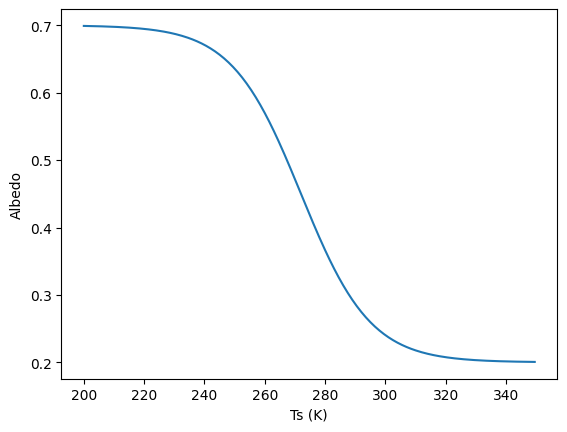

In [3]:
# vector of albedos
fig,ax=plt.subplots()
ax.plot(Ts,alpha(Ts))
ax.set_xlabel("Ts (K)")
ax.set_ylabel("Albedo")

So we can see that for temperatures exceeding 300K roughly, the Earth becomes ice-free and the albedo tends to a fixed values of about 0.2.  As temperature cools the ice edge moves to the south, until for conditions below Ts=225K most of the globe is frozen and the albedo tends to 0.7.  

So now, rather than solve the equation, we are simply going to plot the RHS to get the sign of DT/Dt


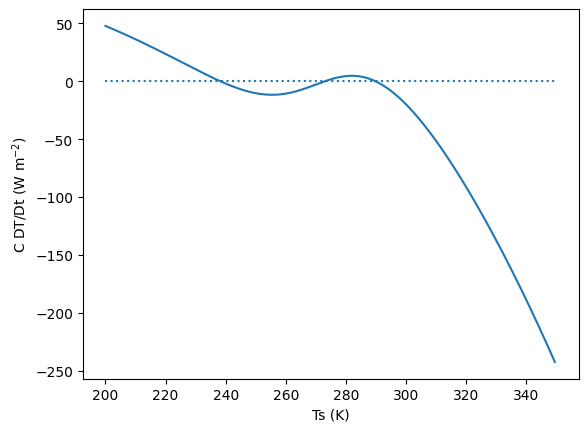

In [4]:
# constants needed
sigma=5.67e-8 # Stefan-B constant 
eps_e=0.61    # equivalent emissivity of surface: 1-eps/2

# define the solar constant array
S0today=1370 

# define the energy balance equation in a function
def cdTdt(S,T):
    """Temperature tendancy=F(S,T), S=Solar constant, T=temperature"""
    return S*(1-alpha(T))/4 - eps_e*sigma*np.power(T,4)

# plot
fig,ax=plt.subplots()
ax.plot(Ts,cdTdt(S0today,Ts))
ax.set_xlabel("Ts (K)")
ax.set_ylabel("C DT/Dt (W m$^{-2}$)")
ax.hlines(0,tmin,tmax,linestyles="dotted")

## Question: Where are the three equilibria temperatures and are they stable or unstable?

When you have discussed this, we will go on to plot a contour plot of $C \frac{DT}{Dt}$ for a range of values for S0 and Ts, with S0 ranging  


In [5]:
# define the solar constant array
S0=np.arange(1000,2000,10)

# make 2D arrays for contour plot:
T2d=np.tile(Ts,(len(S0),1)).transpose()
S2d=np.tile(S0,(len(Ts),1))

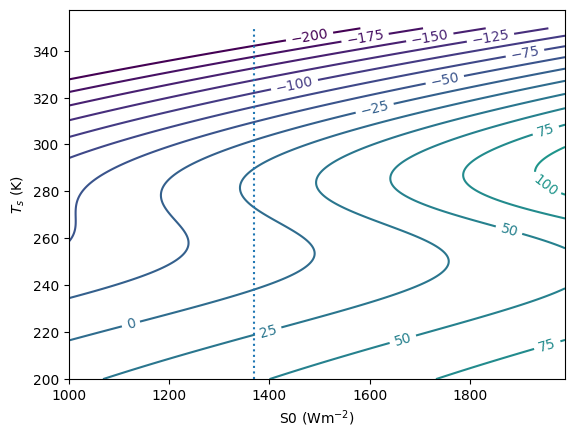

In [6]:
# contour plot
fig,ax=plt.subplots()
X=ax.contour(S0,Ts,cdTdt(S2d,T2d),levels=np.arange(-200,400,25))
ax.clabel(X,fontsize=10)
ax.set_xlabel("S0 (Wm$^{-2}$)")
ax.set_ylabel("$T_s$ (K)")
ax.vlines(S0today,tmin,tmax,linestyles="dotted")

## Question: 
What happens to temperature if you reduce S0 from the present day value to 1000 Wm$^{-2}$?  If you then increase S0 to 1600 W m$^{-2}$, what happens?  Does the temperature trace the same path?

## Exercise

Write a small python code that iterates the temperature until $\frac{Dt}{dt}=0$.  Now do the following...  Starting from $S_0=1600 W m^{-2}$ calculate $T_s$ (use a first guess $T_s$=320K.  Then reduce $S_0$ by 20 W m$^{-2}$, find the new equilibrium (starting the iteration from the previous equilibrium value), repeat until $S_0$=1000 W m$^{-2}$, storing the equilibrium . Then reverse the process by increasing $S_0$ in 20 $W m^{-2}$ steps back to the present day and beyond to 1600 W m$^{-2}$.  Plot $T_s$ against $S_0$.  



Text(0, 0.5, 'Ts(K) ')

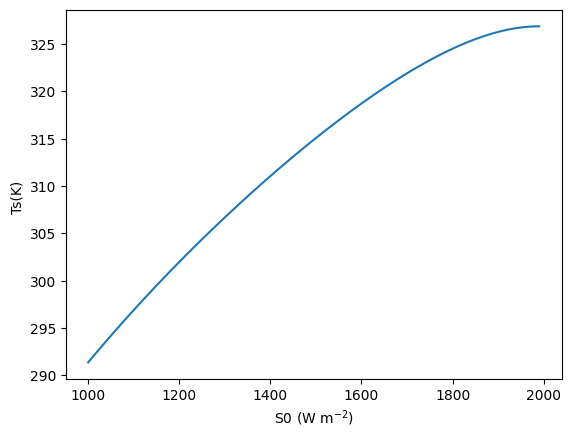

In [7]:
Ts=320. # first guess initial value...

S0vec=np.arange(1000,2000,10)


Cwater=3850
dt=86400*365
Cddt=Cwater*1e6/dt


Tdown=[]

for S0 in np.flip(S0vec):
    deltaT=99
    # find the equilibrium temperature 
    while deltaT > 0.01:
        deltaT=cdTdt(S0,Ts)/Cddt
        Ts+=deltaT
    
    # store Ts value
    Tdown.append(Ts)
    
    # then repest with the reverse array

fig,ax=plt.subplots()
ax.plot(S0vec,np.flip(Tdown))
ax.set_xlabel("S0 (W m$^{-2}$)")
ax.set_ylabel("Ts(K) ")





## Question: 
We will now calculate the ice albedo feedback parameter.

Similarly as we did for the Planck feedback, we need to calculate the rate of change of flux imbalance with respect to temperature:

$$
-\frac{\partial N}{\partial \alpha}\frac{\partial \alpha}{\partial T}=-\underbrace{\frac{-S0}{4}}_{\frac{\partial N}{\partial \alpha}}\underbrace{\frac{1}{4}\frac{1}{23}sech^2\frac{T-272}{23}}_{\frac{\partial \alpha}{\partial T}}
$$

which uses the trig relation $\frac{d tanh(x)}{dx}=sech^2(x)$.

We can now code this up to calculate the feedback, we need the relationship for $sech^2(x)$:

$$sech^2(x)=\left(\frac{2}{e^x+e^{-x}}\right)^2$$

This gives


Text(0.5, 0, 'T (K)')

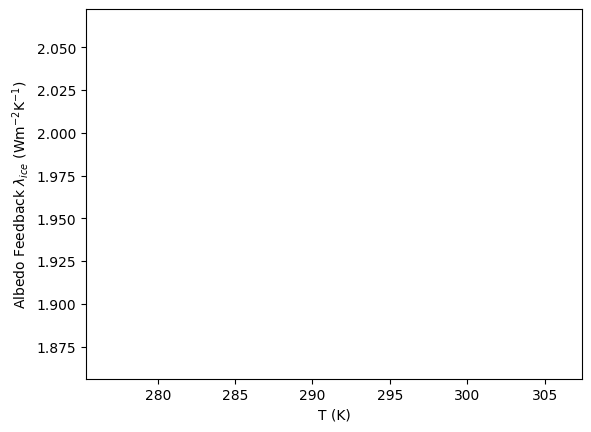

In [8]:
import math as mp
x=(Ts-272)/23

icefeedback=S0today*np.power(2.0/(np.exp(x)+np.exp(-x)),2)/(4*4*23)

fig,ax=plt.subplots()
ax.plot(Ts,icefeedback)
ax.set_ylabel("Albedo Feedback $\lambda_{ice}$ (Wm$^{-2}$K$^{-1}$)")
ax.set_xlabel("T (K)")


Note that the magnitude of the feedback is strongly dependent on the temperature, i.e. the ice albedo feedback strength is not an absolute but depends on the current state.  

## Question: Why is the feedback zero at cold or warm temperatures?

This makes sense if you think about it a little.  For example, at very cold temperatures when the world is ice covered, further decreases in temperature can not increase ice and do little to impact albedo, thus it is clear the feedback should be zero.  Likewise for warm temperatures when the world is ice free. 

## Question: Is the overall feedback (ice+albedo) ever unstable?

Try to add the Planck feedback to the plot... 

Text(0, 0.5, 'Total $\\lambda$ (Wm$^{-2}$K$^{-1}$)')

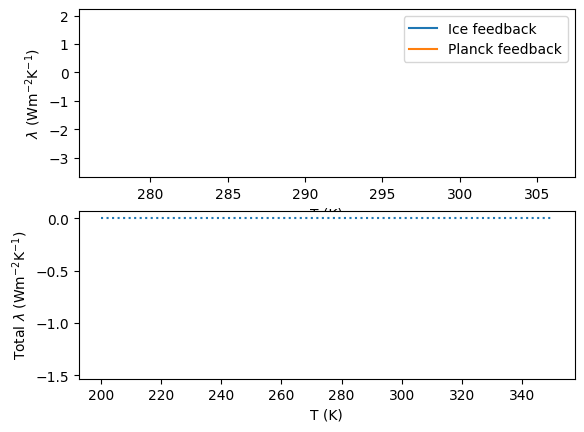

In [9]:
# add hline for magnitude of Planck
planckfeedback=-4.0*eps_e*sigma*np.power(Ts,3)

fig,ax=plt.subplots(nrows=2)
ax[0].plot(Ts,icefeedback,label="Ice feedback")
ax[0].plot(Ts,planckfeedback,label="Planck feedback")
ax[0].set_ylabel("$\lambda$ (Wm$^{-2}$K$^{-1}$)")
ax[0].set_xlabel("T (K)")
ax[0].legend()

feedback=icefeedback+planckfeedback
ax[1].plot(Ts,feedback)
ax[1].hlines(0.0,tmin,tmax,linestyles="dotted")
ax[1].set_xlabel("T (K)")
ax[1].set_ylabel("Total $\lambda$ (Wm$^{-2}$K$^{-1}$)")



We can see that the system is indeed unstable between approximately 255K and 282 K, by finding out the lowest and highest entries where the ice albedo exceeds the Planck feedback, (although to be precise we should really solve with a root finding algorithm).

This very simple model shows the essence of unstable feedback.  In the full zonal model of ice feedback we will see in fact that ice albedo feedback is actually runaway once the ice edge expands to a certain latitude, since the impact of the ice increases as you move towards the equator, which receives more solar insulation over the year.  

In [10]:
#
# rough estimate (to nearest 2K) of unstable regime bounds
#
unstable_min=Ts[np.argwhere(feedback>0).min()]
unstable_max=Ts[np.argwhere(feedback>0).max()]
print("Earth system unstable between ",unstable_min," and ",unstable_max," K")

ValueError: zero-size array to reduction operation minimum which has no identity

## Lesson take home messages:

<ul>
  <li>An overall positive feedback indicates an unstable system</li>
  <li>With only the Planck feedback operating, there is only one stable equilibrium possible in the system </li>
  <li>With a nonlinear ice albedo feedback there is the possibility of hysteresis.  For some values of solar constant there are 3 equilibrium points, 2 stable and one unstable.  As S0 reduces the Earth can flip from the upper stable branch to the lower stable branch.  As S0 increases again the switch will occur at a difference (higher) solar constant value.</li>
  <li>Thus ice-covered states are "sticky", once the Earth is frozen, difficult to get out</li>
  <li> We note that when climate models are discussed, we often talk about them having a positive or negative feedback, this usually refers to all the feedbacks **except** the Planck feedback.  <u>Thus a climate model with positive feedback can still be stable as long as the magnitude does not exceed that of the Planck feedback.</u> </li>  
</ul> 

Finally... if you enjoyed this notebook and wish to investigate further, I suggest trying out the zonal EBM notebook in Brian Rose's coursebook. 